https://www.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v1/subjects/course-project-v5/units/course-project-introduction-v1#resources

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Task 1

In [2]:
# read CSV -> df
df = pd.read_csv('warm-up/task-1.csv', low_memory=False, sep=',')
x = df['x'].values
y = df['y'].values

# Compute Log(x)
logx = np.log(x)

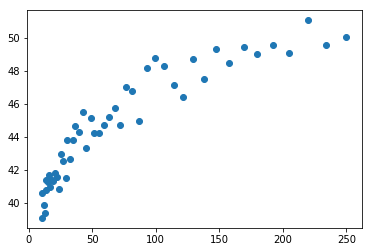

In [3]:
# some visu
plt.scatter(x, y)

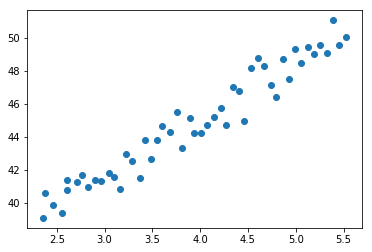

In [4]:
plt.scatter(logx, y)

## Fit the equation using polyfit() and print the a, b parameters.

In [5]:
coefs = np.polyfit(logx, y, deg=1)
[a, b] = coefs
print (a)
print (b)

3.39024099771
31.5292012193


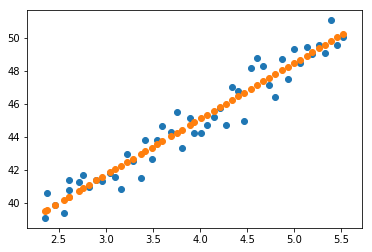

In [6]:
poly_y = np.polyval(coefs, logx)
plt.scatter(logx, y)
plt.scatter(logx, poly_y)

## Plot your model with the 50 data points

In [7]:
x_reg = np.linspace(min(x), max(x), num=50)

In [8]:
y_estimated = a * np.log(x_reg) + b

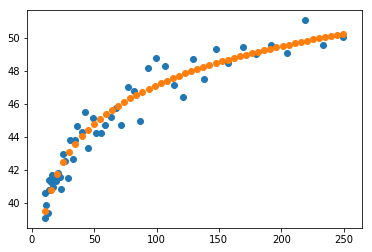

In [9]:
plt.scatter(x, y)
plt.scatter(x_reg, y_estimated)

In [10]:
# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

y_estimated_from_x = a * np.log(x) + b
pred_baseline = np.mean(y) 
rss_baseline = RSS(y, pred_baseline)
rss_baseline 

541.14328721999993

In [11]:
model_rss = RSS(y, y_estimated_from_x)
model_rss

31.842651752756687

In [12]:
R2 = 1 - (model_rss / rss_baseline)
print('R^2 coefficient:', R2) 

R^2 coefficient: 0.941156709314


## Explain how the polyfit() function finds the optimal parameters. (1-2 sentences)

Polyfit uses analytic compuations to find the optimal parameters, ie the parameters that minimizes the sum of the squares of residuals  ( Vandermonde matrix QR factorization is a way to do  it).

## Give two differences between this method and the gradient descent one. Write a short sentence for each one.

- Gradient descent is a numerical way to find the parameters / Polyfit is an analytical way
- polyfit can fit with polynomial functions / Gradient Descent is not limited to RSS minimisation. It'a a more general method to minimise a cost function

# Task 2

## Load and split the data into 80-20 train/test sets

In [13]:
# read CSV -> df
df = pd.read_csv('warm-up/task-2.csv', low_memory=False, sep=',')

In [14]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    df, train_size=80, test_size=20, random_state=0)

In [15]:
# Create X/y variables

X_tr = train_df.drop('y', axis=1).values
y_tr = train_df.y.values

X_te = test_df.drop('y', axis=1).values
y_te = test_df.y.values

## Fit and evaluate a linear regression 

In [16]:
# Linear regression on training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# Median baseline
mae_baseline = MAE(y_te, np.median(y_te))

# predict y from linerar regression
y_pred = lr.predict(X_te)
    
# MAE of the prediction    
mae_lr = MAE(y_te, y_pred)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE baseline: 113.089
MAE linear regression: 69.608


## Improve your test MAE by removing outliers from the train set.

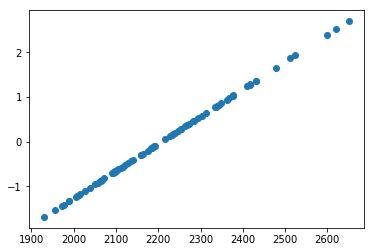

In [18]:
z_scores_ytr = (y_tr - y_tr.mean()) / y_tr.std()

# Plot z-scores for y value
plt.scatter(y_tr, z_scores_ytr)



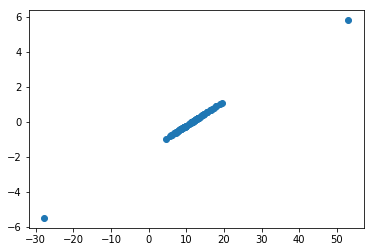

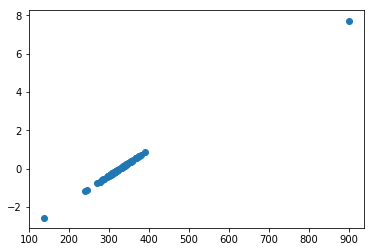

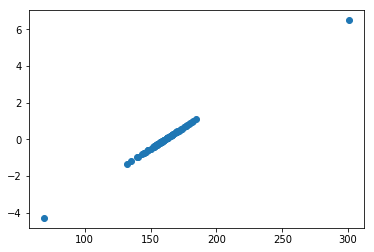

In [19]:
# Plot z-scores for each feature

z_scores_x = []
for k in range(0, X_tr.shape[1]) :
    xk = X_tr[:,k]
    z_scores_xk = (xk - xk.mean()) / xk.std()
    z_scores_x.append(z_scores_xk)
    # Plot z-scores
    plt.scatter(xk, z_scores_xk)
    plt.show()


I decide to define a record as an outlier if absolute of z-score for **y** or for **any feature** is > 2 

In [20]:
idx = (abs(z_scores_x[0]) < 2) & (abs(z_scores_x[1]) < 2) & (abs(z_scores_x[2]) < 2) & (abs(z_scores_ytr) < 2)

In [21]:
X_trf, y_trf = X_tr[idx], y_tr[idx]
lrf = LinearRegression()
lrf.fit(X_trf, y_trf)
y_predf = lrf.predict(X_te)

# MAE of the prediction    
mae_lrf = MAE(y_te, y_predf)

print('MAE linear regression without outliers: {:.3f}'.format(mae_lrf))

MAE linear regression without outliers: 55.899


In [22]:
## Fit a linear regression with Huber loss 

In [23]:
from sklearn.linear_model import HuberRegressor
# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1)
lr_huber.fit(X_tr, y_tr)
# Print the slope of the line
print('Slope:', lr_huber.coef_)
# Output varies around 0.37

# Print the intercept parameter
print('Intercept term:', lr_huber.intercept_)
# Output varies around 1.6

Slope: [ 24.75884329   3.32938168   1.96963194]
Intercept term: 521.425428851


In [24]:
y_values_huber = lr_huber.predict(X_te)
# MAE of the prediction    
mae_huber = MAE(y_te, y_values_huber)

print('MAE linear regression with Huber loss: {:.3f}'.format(mae_huber))

MAE linear regression with Huber loss: 56.995


# Task 3

## Load and split the data into 50-50 train/test sets

In [25]:
# read CSV -> df
df = pd.read_csv('warm-up/task-3.csv', low_memory=False, sep=',')
x = df.x.values
y = df.y.values
df.shape

(50, 2)

In [26]:
train_df, test_df = train_test_split(
    df, train_size=.5, test_size=.5, random_state=0)

# Create X/y variables
x_tr = train_df.x.values
y_tr = train_df.y.values

x_te = test_df.x.values
y_te = test_df.y.values

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly_tr = poly_obj.fit_transform(x_tr[:, np.newaxis])

In [35]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_poly_tr, y_tr)


y_tr_pred = lr.predict(poly_obj.transform(x_tr[:, np.newaxis]))
y_te_pred = lr.predict(poly_obj.transform(x_te[:, np.newaxis]))

In [36]:

rss_tr = RSS(y_tr, y_tr_pred)
rss_te = RSS(y_te, y_te_pred)

print('RSS on traning set: {:.3f}'.format(rss_tr))
print('RSS on test set: {:.3f}'.format(rss_te))

RSS on traning set: 0.684
RSS on test set: 1.513


The model overfit. We can see than RSS on test set is about twice the RSS on the training set

## Plot your model with the 50 data points

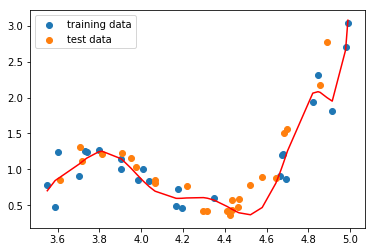

In [37]:
x_sorted  = np.sort(x)

plt.scatter(x_tr, y_tr, label='training data')
plt.scatter(x_te, y_te, label='test data')
plt.plot(x_sorted, lr.predict(poly_obj.transform(x_sorted[:, np.newaxis])), color = 'red')
plt.legend()
plt.show()

## Apply regularization using ridge regression

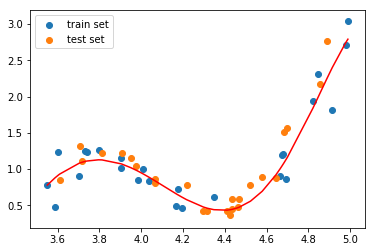

In [71]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge(alpha = 1)
ridge.fit(X_poly_tr, y_tr)



# Plot the model
y_values_ridge = ridge.predict(poly_obj.fit_transform(x_sorted[:, np.newaxis]))

plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.plot(x_sorted, y_values_ridge, color = 'red')
plt.legend()
plt.show()

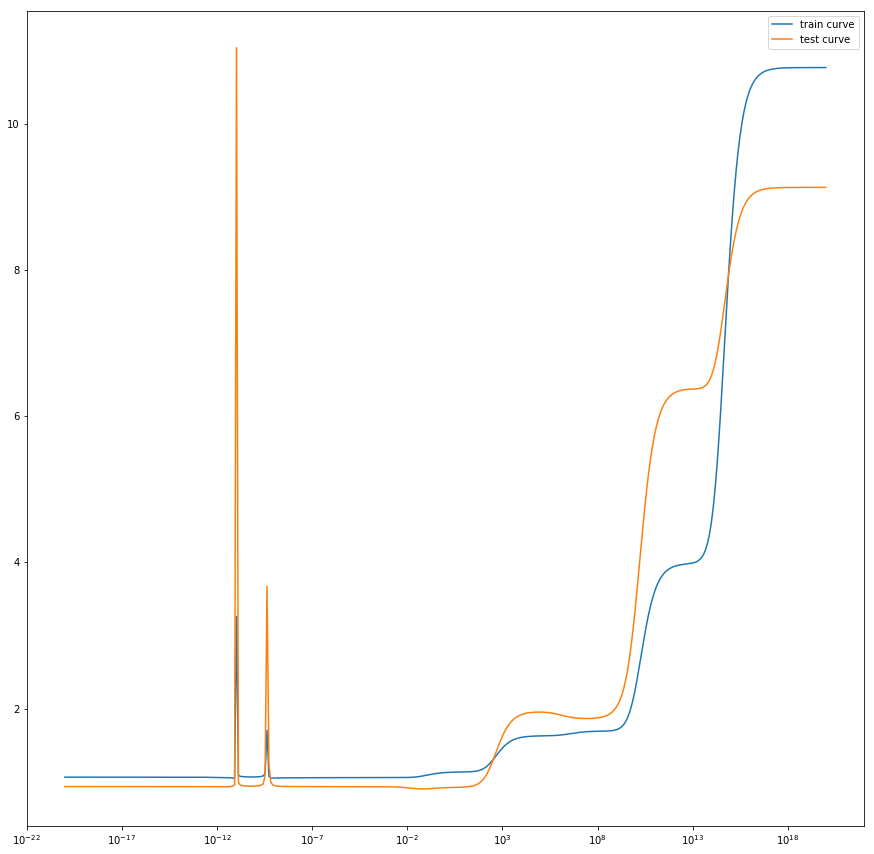

In [72]:
import warnings
# Grid search

# Save error on train/test sets
train_scores = []
test_scores = []

# Define a set of alpha values
alphas = np.logspace(-20, 20, num=400)

for alpha in alphas:
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ridge.fit(X_poly_tr, y_tr)

    y_tr_pred_ridge = ridge.predict(poly_obj.transform(x_tr[:, np.newaxis]))
    y_te_pred_ridge = ridge.predict(poly_obj.transform(x_te[:, np.newaxis]))
    
    rss_tr_ridge = RSS(y_tr, y_tr_pred_ridge)
    rss_te_ridge = RSS(y_te, y_te_pred_ridge)
    
    train_scores.append(rss_tr_ridge)
    test_scores.append(rss_te_ridge)

# Plot the validation curves
plt.figure(figsize=(15,15))
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [73]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_score = test_scores[idx]
best_scoretraining = train_scores[idx]

print('Best alpha value {:.1e}'.format(
    best_alpha))
print('  RSS on traning set: {:.3f}'.format(best_scoretraining))
print('  RSS on test set: {:.3f}'.format(best_score))

Best alpha value 7.0e-02
  RSS on traning set: 1.079
  RSS on test set: 0.900


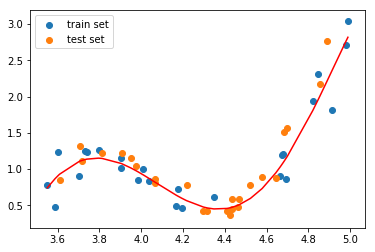

In [74]:
# Ridge regression
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_poly_tr, y_tr)



# Plot the model
y_values_ridge = ridge.predict(poly_obj.fit_transform(x_sorted[:, np.newaxis]))

plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.plot(x_sorted, y_values_ridge, color = 'red')
plt.legend()
plt.show()